In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


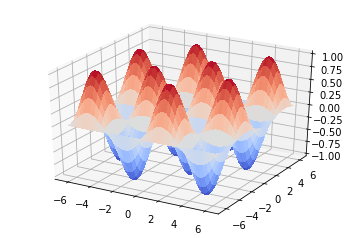

In [40]:
X = np.arange(-2*np.pi, 2*np.pi, 0.1)
Y = np.arange(-2*np.pi, 2*np.pi, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X)*np.sin(Y) #+ np.random.normal(scale=.05, size=X.shape)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [24]:
X.shape

(126, 126)

In [32]:
np.random.normal(scale=1, size=(100,100))

array([[ 0.7725905 ,  0.28222038, -0.48166441, ...,  1.39854226,
         1.05052336,  1.17952183],
       [-0.19882826,  0.16897701,  0.00519488, ...,  1.54963986,
         0.00841106, -0.54763739],
       [ 0.45130861, -0.86868104, -0.72175862, ...,  0.16055759,
        -0.45427176, -0.5034993 ],
       ..., 
       [ 0.34981284,  0.40127128, -1.34020085, ..., -0.18085251,
        -1.05638477, -0.1836373 ],
       [-0.80618714, -0.57931201, -0.2972445 , ..., -1.03722759,
        -0.59694797, -0.45806456],
       [ 1.91663683, -0.81687043,  0.07263003, ...,  0.17703044,
         0.55185529,  2.03317226]])

In [1]:
import tensorflow as tf

In [9]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(1, dtype=tf.float32)
node1, node2

(<tf.Tensor 'Const_6:0' shape=() dtype=float32>,
 <tf.Tensor 'Const_7:0' shape=() dtype=float32>)

In [10]:
sess = tf.Session()
sess.run([node1, node2, tf.add(node1, node2)])

[3.0, 1.0, 4.0]

In [12]:
tf.VERSION

'1.1.0'

In [ ]:
sess.partial_run